# Part 1:
Our first goal is to explore the dataset and prepare it for modeling. 

### Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from statistics import mean

%matplotlib inline

pd.options.display.max_rows = None
pd.options.display.max_columns = None

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Dataset
We begin by importing the 'train' and 'test' sets.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Examine 'Train'
How big is our 'train' set and what sort of information does it contain?
- 42,000 rows of 785 features
- "label" is the *target*, unique to the 'train' set
- goal is to classify digits 0-9
- 784 pixels per image contain value representing contrast with background (0)

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [4]:
train.shape

(42000, 785)

In [5]:
train.label.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [6]:
train.pixel99.describe()

count    42000.000000
mean        13.404952
std         50.894244
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        255.000000
Name: pixel99, dtype: float64

In [7]:
p99 = train[train['pixel99']>0]
p99['pixel99'].describe()

count    3597.000000
mean      156.521546
std        88.572654
min         1.000000
25%        72.000000
50%       172.000000
75%       252.000000
max       255.000000
Name: pixel99, dtype: float64

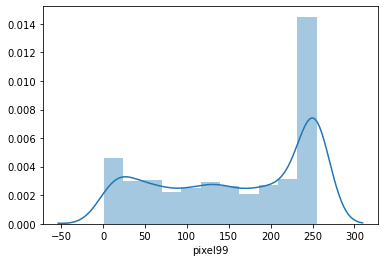

In [8]:
sns.distplot(p99['pixel99'])

### Clean Dataset
The dataset is large but relatively simple so cleaning should be straight-forward.
- Look for NaNs and outliers
- Check dtypes

In [9]:
len_train = train.shape[0]
len_test = test.shape[0]
y_train = train['label']
train.drop('label', axis=1, inplace=True)

In [10]:
data = pd.concat((train, test), sort=False)
data.shape

(70000, 784)

In [11]:
pd.DataFrame({'Percent Missing':(data.isnull().sum()/len(data)*100).sort_values(ascending=False)}).head(5)

,Percent Missing
pixel783,0.0
pixel268,0.0
pixel266,0.0
pixel265,0.0
pixel264,0.0


In [12]:
max_vals = []
for c in data.columns:
    max_vals.append(data[c].max())
max_vals = pd.DataFrame(max_vals, columns=['Maximum Value'])
max_vals.describe()

,Maximum Value
count,784.000000
mean,220.459184
std,80.631533
min,0.000000
25%,255.000000
50%,255.000000
75%,255.000000
max,255.000000


In [13]:
min_vals = []
for c in data.columns:
    min_vals.append(data[c].min())
min_vals = pd.DataFrame(min_vals, columns=['Minimum Value'])
min_vals.describe()

,Minimum Value
count,784.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [14]:
non_ints = 0
for d in data.dtypes:
    if d != 'int64':
        non_ints += 1
non_ints

0

In [15]:
X_train = data[:len_train]
X_train = X_train.astype(np.uint8)
test = data[len_train:]

### Visualization
Each image (row) has 784 pixels (columns) i.e. a 28x28 grid. We can visualize the data using plt.imshow() and a custom function.

In [16]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [np.array(row).reshape((size,size)) for index, row in instances.iterrows()]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'gray', **options)
    plt.axis("off")

<Figure size 1080x360 with 0 Axes>

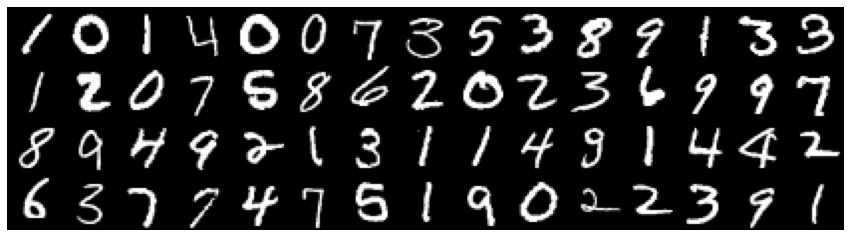

In [17]:
plt.figure(figsize=(15,5))
example_images = X_train[:60]
plot_digits(example_images, images_per_row=15)
plt.show()

# Part 2:
Our second goal is to build an accurate classification model for the dataset.

### Libraries

In [18]:
import matplotlib.image as mpimg

from scipy.ndimage import shift

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import shuffle

### Support Vector Machine
We start with a relatively basic supervised learning classification algorithm, SVM. There are several steps involved in building and testing this model.
- Shuffle 'train'
- Train, Test split from 'train'
- Scale 'train' (mean = 0, variance = 1)
- Build and fit model
- Test model accuracy
- Identify strengths and weaknesses

In [19]:
train = pd.concat((y_train, X_train), axis=1, sort=False)
train = shuffle(train)

In [20]:
# Short Run
# train = train[:2000]

In [21]:
y = train['label']
X = train.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
svm_clf = SVC()
cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.89241623, 0.86948854, 0.86749117])

In [24]:
y_train_pred = cross_val_predict(svm_clf, X_train_scaled, y_train, cv=5)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [25]:
conf_mx

array([[157,   0,   3,   1,   0,   0,   0,   1,   1,   1],
       [  0, 204,   4,   0,   0,   2,   1,   0,   0,   0],
       [  3,   1, 165,   0,   0,   1,   1,   8,   3,   0],
       [  0,   0,   9, 142,   0,   5,   0,   3,   5,   2],
       [  0,   1,   4,   0, 128,   2,   0,   4,   0,   6],
       [  0,   1,   6,   4,   1, 126,   2,   6,   3,   4],
       [  0,   0,   7,   0,   1,   3, 132,   5,   2,   0],
       [  0,   2,   3,   1,   2,   0,   0, 154,   1,   8],
       [  1,   3,   4,   6,   1,   7,   1,   3, 151,   6],
       [  1,   0,   2,   4,   8,   1,   0,  10,   2, 147]], dtype=int64)

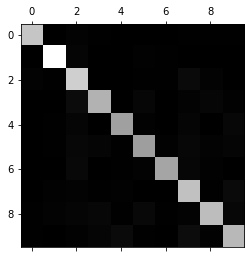

In [26]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [27]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

([<matplotlib.axis.XTick at 0x20084d4f508>,
 <a list of 9 Text major ticklabel objects>)

([<matplotlib.axis.YTick at 0x200877f5b48>,
 <a list of 9 Text major ticklabel objects>)

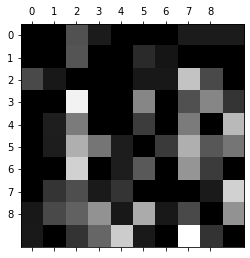

In [28]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xticks(np.arange(0, 9, step=1))
plt.yticks(np.arange(0, 9, step=1))
plt.show()

### K-nearest Neighbor
Next we build a more customizable model using the K-nearest Neighbor (KNN) algorithm. Like before, there are several steps involved in building and testing this model.
- Shuffle 'train' (already done)
- Train, Test split from 'train'
- Build and fit model
- Grid search to hone hyperparameters
- Test model accuracy

In [29]:
y = train['label']
X = train.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [30]:
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train, cv=5, scoring="accuracy")

array([0.88823529, 0.88529412, 0.86470588, 0.85882353, 0.85      ])

Fitting took a long time, so we want to work with a smaller dataset while we test different hyperparameters.

In [31]:
y = train['label']
X = train.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [32]:
gs_clf = GridSearchCV(knn_clf, {
    'n_neighbors': [2, 3, 6, 10], 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}, cv=5, n_jobs=-1, return_train_score=False)

In [33]:
gs_results = gs_clf.fit(X_train, y_train)

In [34]:
gs_table = pd.DataFrame(gs_results.cv_results_)
gs_table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.288063,0.021796,1.274960,0.042749,euclidean,2,uniform,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.855882,0.879412,0.847059,0.844118,0.850000,0.855294,0.012671,11
1,0.287865,0.022009,1.287365,0.018556,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.891176,0.911765,0.879412,0.885294,0.879412,0.889412,0.011998,1
2,0.291063,0.010503,1.275959,0.050472,euclidean,3,uniform,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.876471,0.900000,0.855882,0.852941,0.844118,0.865882,0.020086,7
3,0.279053,0.021460,1.246733,0.029286,euclidean,3,distance,"{'metric': 'euclidean', 'n_neighbors': 3, 'wei...",0.888235,0.905882,0.870588,0.867647,0.852941,0.877059,0.018264,2
4,0.288262,0.025055,1.277355,0.033871,euclidean,6,uniform,"{'metric': 'euclidean', 'n_neighbors': 6, 'wei...",0.867647,0.888235,0.855882,0.870588,0.847059,0.865882,0.013995,7
5,0.276647,0.013270,1.210904,0.039396,euclidean,6,distance,"{'metric': 'euclidean', 'n_neighbors': 6, 'wei...",0.882353,0.900000,0.870588,0.876471,0.847059,0.875294,0.017210,3
6,0.266443,0.004075,1.260341,0.017411,euclidean,10,uniform,"{'metric': 'euclidean', 'n_neighbors': 10, 'we...",0.879412,0.861765,0.841176,0.858824,0.841176,0.856471,0.014337,10
7,0.287858,0.009295,1.209500,0.062654,euclidean,10,distance,"{'metric': 'euclidean', 'n_neighbors': 10, 'we...",0.885294,0.876471,0.864706,0.876471,0.847059,0.870000,0.013206,5
8,0.272247,0.008469,1.219506,0.005822,manhattan,2,uniform,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.844118,0.861765,0.850000,0.832353,0.835294,0.844706,0.010588,15
9,0.292868,0.019124,1.133428,0.130443,manhattan,2,distance,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.879412,0.905882,0.855882,0.876471,0.858824,0.875294,0.017900,3


In [35]:
gs_results.best_score_

0.8894117647058823

In [36]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}

Now that we have identified our best hyperparameters, let's fit this model for the full training set.

In [37]:
y = train['label']
X = train.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [38]:
knn_clf_2 = KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')
cross_val_score(knn_clf_2, X_train, y_train, cv=5, scoring="accuracy")

array([0.88235294, 0.9       , 0.87058824, 0.87647059, 0.84705882])

In [39]:
y_train_pred_2 = cross_val_predict(knn_clf_2, X_train, y_train, cv=5)
conf_mx_2 = confusion_matrix(y_train, y_train_pred_2)

In [40]:
conf_mx_2

array([[159,   0,   0,   0,   0,   1,   4,   0,   0,   0],
       [  0, 208,   1,   0,   1,   0,   0,   1,   0,   0],
       [  6,  14, 147,   3,   0,   0,   0,  10,   2,   0],
       [  1,   3,   2, 142,   0,  10,   1,   1,   3,   3],
       [  0,   3,   0,   0, 117,   0,   0,   4,   1,  20],
       [  1,   3,   0,   9,   1, 125,   4,   0,   3,   7],
       [  3,   2,   0,   0,   0,   0, 144,   0,   1,   0],
       [  0,   8,   0,   0,   1,   0,   0, 151,   0,  11],
       [  1,  10,   2,   9,   2,   5,   4,   1, 140,   9],
       [  1,   1,   0,   3,   6,   0,   1,   7,   1, 155]], dtype=int64)

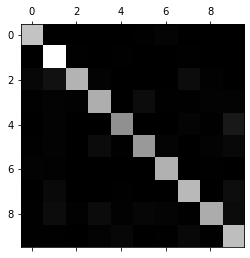

In [41]:
plt.matshow(conf_mx_2, cmap=plt.cm.gray)
plt.show()

While this model is very accurate, its accuracy could potentially be improved with data augmentation. We should try shifting the images to create a larger and more diverse dataset.

In [42]:
def shift_image(image, x_shift, y_shift):
    image = image.reshape((28,28))
    new_image = shift(image, [x_shift, y_shift])
    return new_image.reshape([-1])

In [43]:
X_train_augment = pd.DataFrame(X_train).reset_index(drop=True)

In [44]:
row = len(X_train_augment)
for x_shift, y_shift in ((5, 0), (-5, 0), (0, 5), (0, -5)):
    for index, image in X_train.iterrows():
        X_train_augment.loc[row] = shift_image(np.array(image), x_shift, y_shift)
        row += 1

<Figure size 1080x360 with 0 Axes>

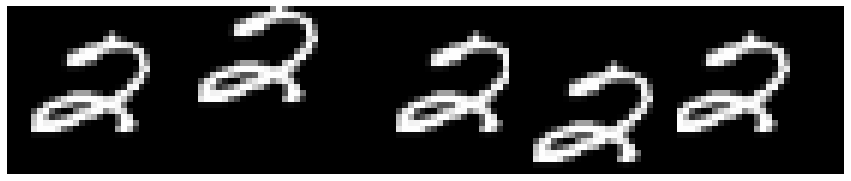

In [68]:
plt.figure(figsize=(15, 5))
example_images = X_train_augment.iloc[[8, 3408, 5108, 1708, 6808]]
plot_digits(example_images, images_per_row=5)
plt.show()